In Lecture 23 of MCS 320, we consider integration and summation.

# 1. Symbolic and Numeric Integration

If a symbolic antiderivative exists, then we can interchange ``diff`` with ``integral``.

In [1]:
f = cos(x)

In [2]:
diff(f, x)

-sin(x)

In [3]:
integral(f, x)

sin(x)

In [4]:
diff(integral(f,x),x)

cos(x)

In [5]:
integral(diff(f,x),x)

cos(x)

In many cases, a symbolic antiderivative does not exist.

In [6]:
e = cos(exp(x^2))
integral(e, x)

integrate(cos(e^(x^2)), x)

We can ask to compute a numerical approximation for the definite integral.  First we can define the symbolic expression of the integral and specify the ``hold = True`` which does not evaluate the function call.

In [7]:
ie = integral(e, (x, 0, 1), hold=True)
show(ie)

integrate(cos(e^(x^2)), x, 0, 1)

A numerical approximation with 16 decimal places is computed below.

In [8]:
ie.n(digits=16)

0.1128234569369889

# 2. Symbolic Bounds

If a symbolic antiderivate exists, then we can apply the fundamental theorem of calculus.

Let $F(x) = \int f(x) dx$, then

$$
    \int_a^b f(x) dx = F(b) - F(a).
$$

Let us try to apply this with $f = 1/x^2$.

In [9]:
f(x) = 1/x^2
F = integral(f, x)
F

x |--> -1/x

In [10]:
a, b = var('a, b')
ie = integral(f, (x, a, b), hold=True)
show(ie)

integrate(x^(-2), x, a, b)

In [11]:
F(b) - F(a)

1/a - 1/b

Removing the hold on the integral does not work!

In [12]:
# ie.unhold() # remove comment to see the error message 

The reason for this error can be explained by a plot.

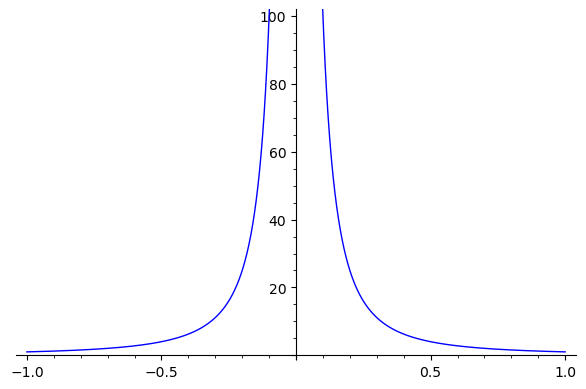

In [13]:
plot(1/x^2, (x, -1, 1), ymax=100)

The integral can be computed formally by adding assumptions on the bounds.

In [14]:
assume(a > 0, b > a)

In [15]:
ie.unhold()

1/a - 1/b

# 3. Summation and Limits

In [16]:
k, n = var('k, n')
S = sum(k, k, 1, n, hold=True)
show(S)

sum(k, k, 1, n)

In [17]:
s = S.unhold()
show(s)

1/2*n^2 + 1/2*n

In [18]:
f = factor(s)
show(f)

1/2*(n + 1)*n

Let us look at the geometric sum, for some ratio ``r``.

In [19]:
r = var('r')

In [20]:
S = sum(r^k, k, 0, n, hold=True)
s = S.unhold()
show(S,'=' ,s)

sum(r^k, k, 0, n) '=' (r^(n + 1) - 1)/(r - 1)

What happens if ``r`` becomes one?

In [21]:
s.limit(r=1)

n + 1

Another type of limit considers sums with an infinite number of terms.

In [22]:
sum(1/k^2, k, 1, oo)

1/6*pi^2

The ``oo`` stands for $\infty$.  The above sum is equivalent to a limit.

In [23]:
S = sum(1/k^2, k, 1, n)
S.limit(n = oo)

limit(harmonic_number(n, 2), n, +Infinity)

The Harmonic numbers are sums of reciprocals of the first positive integers.